In [1]:
import numpy as np
from sklearn.cluster import AffinityPropagation

import pygraphviz as pgv
from IPython.display import Image, Markdown, display

from kmcluster.core.utils import fetch_pt7_data, fetch_huanchen, fetch_huanchen_plot
from kmcluster.core.data import sparse_to_mat
from kmcluster.core.data import nice_print_clusters, energy_to_rates
from kmcluster.core.intialize import random_init, boltz
from kmcluster.core.viz import graph_trajectories_static
from kmcluster.core.cluster import (
    affinity_at_temp,
    plot_coms_cdlib,
    plot_affinity_at_temp,
)

# supress warnings
import warnings

warnings.filterwarnings("ignore")

/home/santiagovargas/anaconda3/envs/allegro/lib/python3.9/site-packages/brisk/funcs.py:99: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dot(x, y):
/home/santiagovargas/anaconda3/envs/allegro/lib/python3.9/site-packages/brisk/funcs.py:174: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def interp(x, xp, fp):
/home/santiagovargas/anaconda3/envs/allegro/lib/pyt

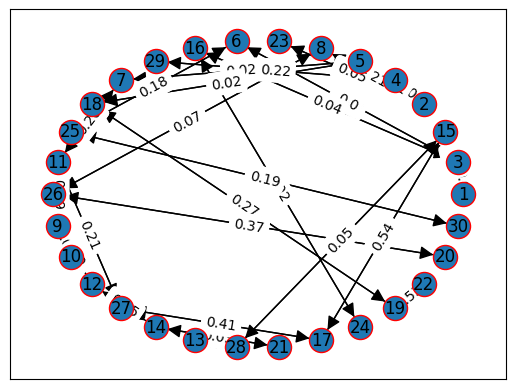

In [2]:
# Pt7_all, Pt7_rel = Pt7_bars = fetch_pt7_data()
# energies_mat = sparse_to_mat(Pt7_all)

huan_all, huan_rel = huan_bars = fetch_huanchen_plot()
energies_huan_mat = sparse_to_mat(huan_all)
G = graph_trajectories_static(energies_huan_mat)

In [3]:
temp_boltz = 700 * 8.617 * 10 ** (-5)
init_boltz = boltz(energies=huan_rel, T=temp_boltz, size=10000)
init_random = random_init(10000, energies_huan_mat.shape[0])


# this is needed for some graph methods to update the edge weights(affinities)
def add_rates_as_weights_to_graph(G, energies_mat, temp):
    rate_mat = energy_to_rates(energies_mat, temp, scale=1)
    for i, j in G.edges():
        G.edges[i, j]["weight"] = rate_mat[i - 1, j - 1]
    return G

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

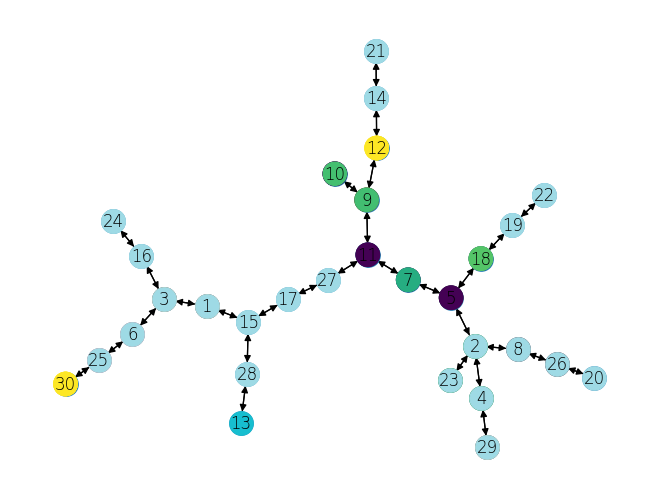

In [11]:
plot_affinity_at_temp(
    G,
    energies_huan_mat,
    huan_rel,
    weightage=init_boltz.get_init_populations(),
    temperature=700,  # don't use boltz_temp!!!
)

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

# you have to call this every time you want to change temps!
G = add_rates_as_weights_to_graph(G, energies_huan_mat, 700)

In [50]:
from cdlib.algorithms import (
    threshold_clustering,
    agdl,
    aslpaw,
    infomap,
    surprise_communities,
    rb_pots,
)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

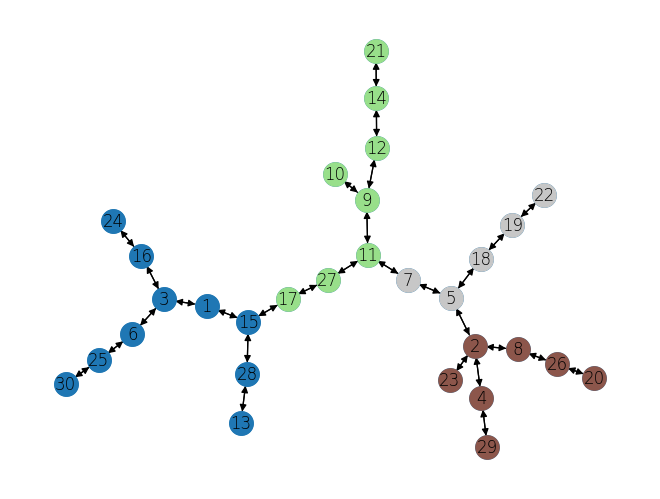

In [51]:
# threshold_clustering
coms = threshold_clustering(G, threshold_function=np.mean)
plot_coms_cdlib_at_temp(G, coms.communities)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

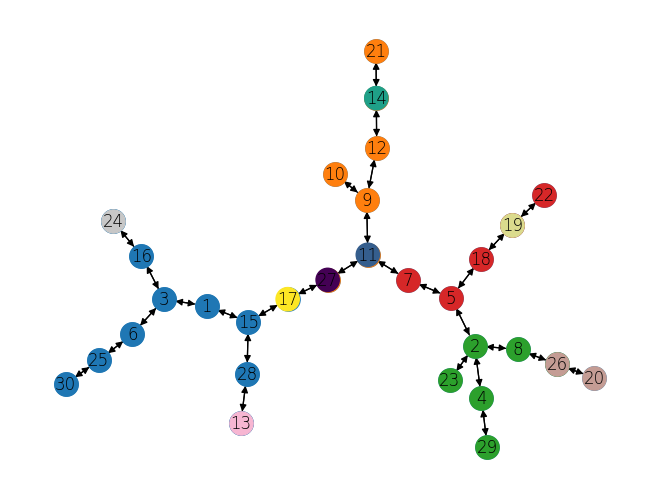

In [52]:
# aslpaw
coms = aslpaw(G)
plot_coms_cdlib(G, coms.communities)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

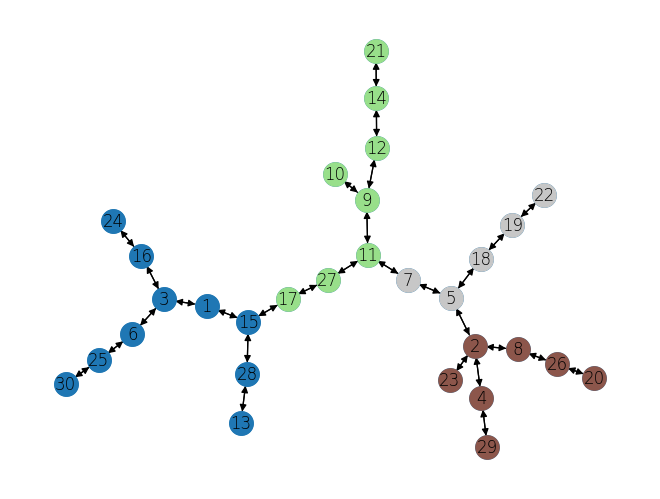

In [53]:
# agdl
coms = agdl(G, number_communities=20, kc=3)
plot_coms_cdlib(G, coms.communities)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


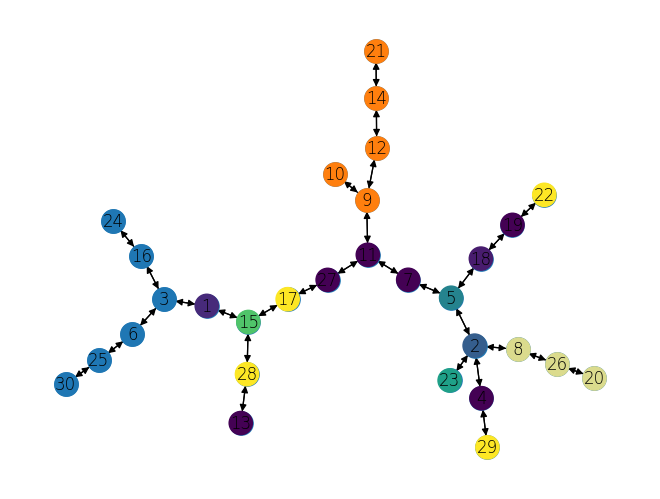

In [54]:
# infomap
coms = infomap(G)
plot_coms_cdlib(G, coms.communities)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

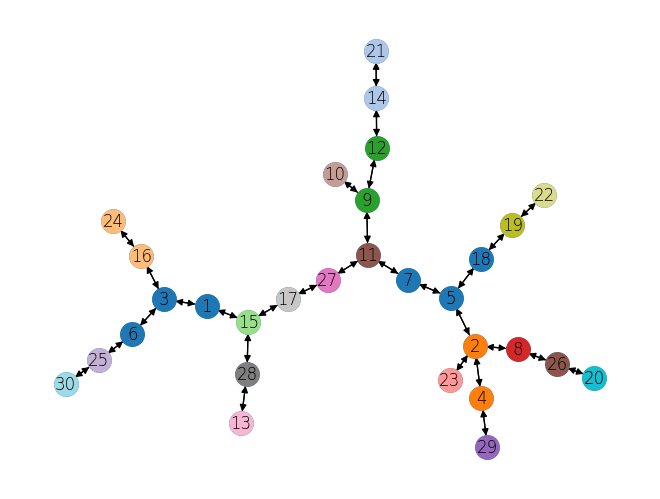

In [42]:
# surprise_communities
coms = surprise_communities(G, weights="weight")
plot_coms_cdlib(G, coms.communities)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

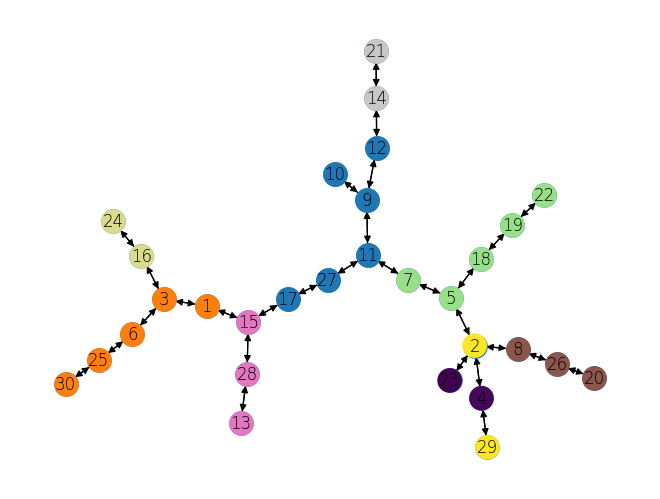

In [47]:
# rb_pots
# resolution parameter - nice parameter to play with for size of communities
# higher value -> smaller communities
coms = rb_pots(G, weights="weight", resolution_parameter=1.0)
plot_coms_cdlib(G, coms.communities)

In [44]:
import leidenalg as la

In [58]:
# convert networkx graph to igraph
import igraph as ig

ig_G = ig.Graph.from_networkx(G)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

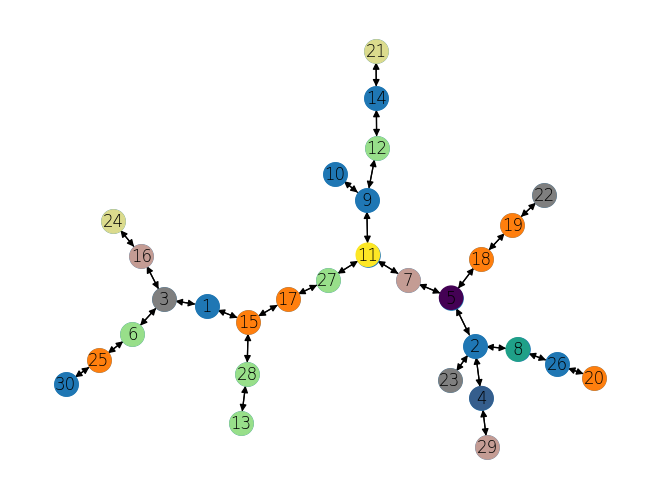

In [77]:
partition = la.find_partition(
    ig_G, 
    la.ModularityVertexPartition, 
    weights="weight", 
    n_iterations=-1)
membership_list_ld = partition.membership
cdlib_coms_ld = [[] for i in range(len(set(membership_list_ld)))]
for i, j in enumerate(membership_list_ld):
    cdlib_coms_ld[j].append(i + 1)
plot_coms_cdlib(G, cdlib_coms_ld)

In [72]:
cdlib_coms_ld

[[1, 2, 9, 10, 14, 26, 30],
 [15, 17, 18, 19, 20, 25],
 [6, 12, 13, 27, 28],
 [4, 5, 8, 11],
 [3, 22, 23],
 [7, 16, 29],
 [21, 24]]